<a href="https://colab.research.google.com/github/john299792/Mask-Detection-Project/blob/master/mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

print('Tensorflow version: ' + tf.__version__)

Tensorflow version: 2.2.0-rc3


In [3]:
#For now I'm uploading a zip with 100 of each type of image in subfolders called mask and nomask
#The full dataset would be slow to upload this way, so we'll use google drive integration or something later
from google.colab import files
uploaded = files.upload()

Saving test.zip to test.zip


In [4]:
!unzip "test.zip" -d data

Archive:  test.zip
   creating: data/test/
   creating: data/test/mask/
  inflating: data/test/mask/0_0_0(1)(1).jpg  
  inflating: data/test/mask/0_0_0(1).jpg  
  inflating: data/test/mask/0_0_0(10)(1).jpg  
  inflating: data/test/mask/0_0_0(10).jpg  
  inflating: data/test/mask/0_0_0(11).jpg  
  inflating: data/test/mask/0_0_0(2).jpg  
  inflating: data/test/mask/0_0_0(3)(1).jpg  
  inflating: data/test/mask/0_0_0(3).jpg  
  inflating: data/test/mask/0_0_0(4)(1).jpg  
  inflating: data/test/mask/0_0_0(4).jpg  
  inflating: data/test/mask/0_0_0(5)(1).jpg  
  inflating: data/test/mask/0_0_0(5).jpg  
  inflating: data/test/mask/0_0_0(6)(1).jpg  
  inflating: data/test/mask/0_0_0(6).jpg  
  inflating: data/test/mask/0_0_0(7)(1).jpg  
  inflating: data/test/mask/0_0_0(7).jpg  
  inflating: data/test/mask/0_0_0(8).jpg  
  inflating: data/test/mask/0_0_0(9).jpg  
  inflating: data/test/mask/0_0_0.jpg  
  inflating: data/test/mask/0_0_0066ichXly3gbb630i4w6j30u00tzjtk.jpg  
  inflating: data/t

In [8]:
from os import listdir
from keras.preprocessing.image import load_img, ImageDataGenerator, array_to_img, img_to_array

'''datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('data/train/cats/cat.0.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)'''


#todo just use flow_from_directory
files = listdir("data/test/mask")
masked_images = [load_img("data/test/mask/" + i) for i in files if i.endswith('.jpg')]
files = listdir("data/test/nomask")
unmasked_images = [load_img("data/test/nomask/" + i) for i in files if i.endswith('.jpg')]



0_0_18.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
None


In [10]:
print(type(masked_images[0]))
print(type(unmasked_images[0]))
masked_images[0].show()

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [0]:
import random
masked_labels = [1 for x in masked_images]
unmasked_labels = [0 for x in unmasked_images]

images = masked_images + unmasked_images
labels = masked_labels + unmasked_labels

#Shuffle images and labels while keeping them paired together
temp = list(zip(images, labels)) 
random.shuffle(temp) 
images, labels = zip(*temp) 


x_train = images[:int(len(masked_images)*0.5)]
x_test = images[int(len(masked_images)*0.5):]
y_train = labels[:int(len(unmasked_images)*0.5)]
y_test = labels[int(len(unmasked_images)*0.5):]



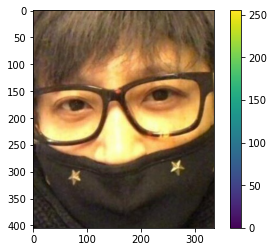

In [12]:
from matplotlib import pyplot as plt
plt.figure()
plt.imshow(images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
import keras
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

model.evaluate(x_test,  y_test, verbose=2)